In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import scipy.special as sps
import warnings
import statsmodels.api as sm


In [2]:
df = pd.read_excel('price.xlsx')

In [3]:
df.columns = map(str.lower, df.columns)
df.head()

,unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
research_list = ["crim", "zn", "indus", "nox", "rm", "age", "dis", "rad", "lstat", "price"]

__Корреляционная матрица__

In [5]:
corr_m = df[research_list].corr()
corr_m

,crim,zn,indus,nox,rm,age,dis,rad,lstat,price
crim,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.603800,-0.483725
nox,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.488676,-0.381626
lstat,0.455621,-0.412995,0.603800,0.590879,-0.613808,0.602339,-0.496996,0.488676,1.000000,-0.737663
price,-0.388305,0.360445,-0.483725,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.737663,1.000000


- смотрим на коэффициенты корреляции с price больше 0,5 
- lstat -0.737663 (более низкий статус населения) и rm (среднее количество комнат в жилом помещении) 0.695360

Коэффициент корреляции 0.6953599470715393


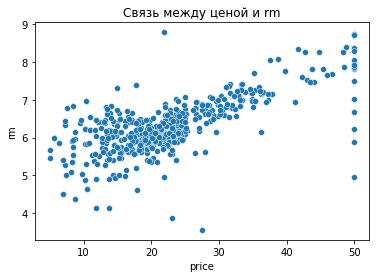

Коэффициент корреляции -0.7376627261740151


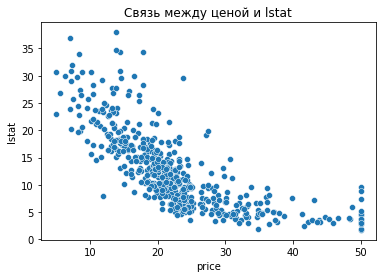

In [20]:
level > 0.5
for i in research_list[:-1]:
    curr_corr = df[i].corr(df.price)
    if abs(curr_corr) >= level:
        sns.scatterplot(x="price", y=i, data=df)
        print("Коэффициент корреляции " + str(curr_corr))
        plt.title("Связь между ценой и "+str(i))
        plt.show()

__Линейная модель регрессии с включением фактора Lstat__

In [6]:
df_lstat = df.loc[:, 'lstat':'price']
df_lstat
#lstat - независимая переменая X, price - зависимая переменная Y

,lstat,price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


In [26]:
#проверка нулевых значений
df_lstat.isnull().sum()

lstat    0
price    0
dtype: int64

In [8]:
X = df_lstat[['lstat']]
Y = df_lstat[['price']]

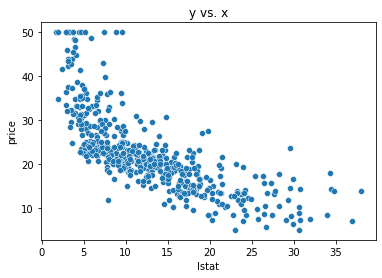

In [29]:
#строим scatter plot
sns.scatterplot(data=df_lstat,x='lstat',y='price')
plt.xlabel('lstat')
plt.ylabel('price')
plt.title('y vs. x')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#скрипт разделяет 80% данных на обучающий набор, а 20% данных – на набор тестов. 

In [13]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
print(regressor.intercept_)
#B0 value

[34.76519272]


In [15]:
print(regressor.coef_)
#B1 value

[[-0.95648761]]


In [16]:
print(regressor.score(X,Y))
#r2 коэффициент детерминации

0.5439214616845225


- Коэффициент детерминации показывает, какая доля дисперсии результативного признака объясняется влиянием независимых переменных.


- Чем ближе значение коэффициента к 1, тем сильнее зависимость.


- В нашем случае r2 = 0,54 (по шкале Чеддока 0,5-0,7 заметная сила связи).


- Вариация цены объясняется на 54% моделью и остальная часть - неучтенными в модели факторами.


__Построенная при таких условиях регрессионная модель имеет низкое практическое значение__

In [ ]:
у=34.76+(-0.95)*х уравнение регрессии

In [21]:
regressor.intercept_ + regressor.coef_*6

array([[29.02626705]])

- Это означает, что на каждую единицу изменения в изученном показателе lstat (более низкий статус населения) изменение цены (price) составляет около -0,95


- При увеличении на 1 фактора 'lstat', 'y' уменьшится на 0,95


__Линейная модель регрессии с включением фактора rm__

In [22]:
df_rm = df.loc[:, 'rm':'price']
df_rm_new = df_rm.drop(['age', 'dis', 'rad','tax', 'ptratio', 'b', 'lstat'], axis=1)
#rm - независимая переменая X, price - зависимая переменная Y

In [60]:
#проверка нулевых значений
df_rm_new.isnull().sum()

rm       0
price    0
dtype: int64

In [35]:
df_rm_new[['rm']]

,rm
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [23]:
X_2 = df_rm_new[['rm']]
Y_2 = df_rm_new[['price']]

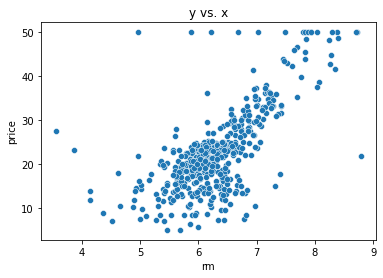

In [62]:
#строим scatter plot
sns.scatterplot(data=df_rm_new,x='rm',y='price')
plt.xlabel('rm')
plt.ylabel('price')
plt.title('y vs. x')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y__train, y_test = train_test_split(X_2, Y_2, test_size=0.2, random_state=0)
#скрипт разделяет 80% данных на обучающий набор, а 20% данных – на набор тестов. 

In [27]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
print(regressor.intercept_)
#B0 value

[-36.47618963]


In [29]:
print(regressor.coef_)
#B1 value

[[9.37638431]]


In [31]:
print(regressor.score(X_2,Y_2))
#r2 коэффициент детерминации

0.4830070551790612


- В нашем случае r2 = 0,48 (по шкале Чеддока 0,3-0,5 умеренная сила связи).


- Вариация цены объясняется на 48% моделью и остальная часть - неучтенными в модели факторами.


__Построенная при таких условиях регрессионная модель имеет низкое практическое значение__

In [ ]:
у=(-36.47)+9.37*х уравнение регрессии

In [40]:
regressor.intercept_ + regressor.coef_*6

array([[19.78211625]])

- Это означает, что на каждую единицу изменения в изученном показателе rm (среднее количество комнат в жилом помещении) изменение цены (price) составляет около 9,37


- При увеличении на 1 фактора 'rm', 'y' (price) увеличится на 9,37

__Модель множественной регрессии__

In [4]:
X_3 = df[["crim", "zn", "indus", "nox", "rm", "age", "dis", "rad", "lstat"]]

In [5]:
Y_3 = df.price

In [9]:
X_3 = sm.add_constant(X_3)  # добавить константу, чтобы был свободный член
model = sm.OLS(Y_3, X_3)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     121.7
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          1.63e-119
Time:                        12:50:40   Log-Likelihood:                -1545.3
No. Observations:                 506   AIC:                             3111.
Df Residuals:                     496   BIC:                             3153.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5712      4.019      3.875      0.0

- При множественном анализе оцениваем Adj. R-squared: 0.683


- Выбранная модель объясняет примерно 68 % дисперсии (окр. до целого). 

- При единичном изменении показателя RM, цена ВОЗРАСТАЕТ на 4.3835, при единичном изменении показателя lstat, цена уменьшается на -0.5813.


__Можно ли улучшить полученную модель множественной регрессии?__

Можно. 

- Предполагается, что связь между нашими переменными линейная. Однако для улучшения полученной модели множественной регрессии нужно посмотреть на двумерные диаграммы рассеяния переменных, представляющих интерес. Если нелинейность связи очевидна, то можно рассмотреть или преобразования переменных (логарифмирование данных) или явно допустить включение нелинейных членов.


- Предполагается, что остатки распределены нормально (т.е. подчиняются закону нормального распределения), поэтому прежде чем сделать окончательные выводы, нам нужно рассмотреть распределения представляющих интерес переменных. Можно построить гистограммы для визуального анализа их распределения.


- Можно обнаружить выбросы (т.е. экстремальные наблюдения), которые могут вызвать серьезное смещение оценок, "сдвигая" линию регрессии в определенном направлении и тем самым, вызывая смещение регрессионных коэффициентов. А мы видели из графиков в самом начале, что такие переменные, как "rm" и "lstat" явно наглядно имеют выбросы. Даже исключение всего одного экстремального наблюдения приведет к совершенно другому результату.

__-__

In [12]:
bikeshare = pd.read_csv("bikeshare.csv")
bikeshare = bikeshare[['holiday', 'workingday', 'season', 'humidity', 'temp', 'windspeed', 'count']]
bikeshare

,holiday,workingday,season,humidity,temp,windspeed,count
0,0,0,1,81,9.84,0.0000,16
1,0,0,1,80,9.02,0.0000,40
2,0,0,1,80,9.02,0.0000,32
3,0,0,1,75,9.84,0.0000,13
4,0,0,1,75,9.84,0.0000,1
...,...,...,...,...,...,...,...
10881,0,1,4,50,15.58,26.0027,336
10882,0,1,4,57,14.76,15.0013,241
10883,0,1,4,61,13.94,15.0013,168
10884,0,1,4,61,13.94,6.0032,129


In [48]:
bikeshare.windspeed.describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [54]:
#mean (среднее) = 12.799395
#перцентили 50, 75, 90, 99
np.percentile(bikeshare.windspeed, [50, 75, 90, 99])

array([12.998 , 16.9979, 23.9994, 35.0008])

In [61]:
#50% показателей скорости ветра <12,998 (меньше среднего показателя в данных)
#90% показателей скорости ветра < 23.9994, 10% больше (именно количество)

In [56]:
#мода (в нащем кокретном случае наиболее часто вречающееся значение = 0)
bikeshare.windspeed.mode()

0    0.0
Name: windspeed, dtype: float64

In [63]:
#дисперсия (степень отклонения каждого наблюдения от средней арифметической) = 67
#Чем больше отклонение, тем больше изменчивость, вариабельность наблюдений.
bikeshare.windspeed.var()

66.659669761339

In [77]:
bikeshare.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [57]:
#mean (среднее) = 20.23086
#перцентили 50, 75, 90, 99
np.percentile(bikeshare.temp, [50, 75, 90, 99])

array([20.5 , 26.24, 30.34, 36.08])

In [58]:
#50% показтелей температуры < 20.5, 90% показателей температуры < 30.34, следлвательно 10% больше (количество).

In [50]:
#мода (в показателях температуры наиболее часто втсречающее значение - 14.76)
bikeshare.temp.mode()

0    14.76
Name: temp, dtype: float64

In [62]:
#дисперсия (степень отклонения каждого наблюдения от средней арифметической) = 61
#Чем больше отклонение, тем больше изменчивость, вариабельность наблюдений.
bikeshare.temp.var()

60.70887229692925

__Гистограммы распределения датасета__

<AxesSubplot:>

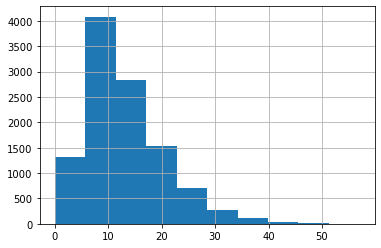

In [67]:
bikeshare.windspeed.hist()
#полученная гистограмма распределения показателей скорости ветра явно не имеет гауссово распределение 
#(отсутствует форма колокола)

<AxesSubplot:>

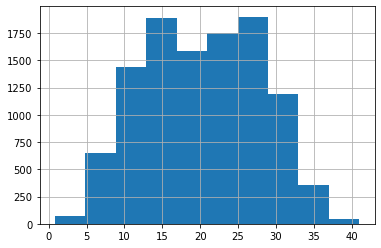

In [64]:
bikeshare.temp.hist()
#видим гауссовидную форму данных, которая, хотя и не сильно знакома в форме колокола, является грубым приближением

In [68]:
#Чтобы приблизить показатели сокрости ветра к нормальному распределению, воспользуемся функцией логарифримирования данных

In [85]:
bikeshare_new = bikeshare.query('windspeed>0')

In [86]:
bikeshare_new['wind_log']=np.log(bikeshare_new.windspeed)

C:\Users\USER\AppData\Local\Temp\ipykernel_15916\1515240897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikeshare_new['wind_log']=np.log(bikeshare_new.windspeed)


In [87]:
bikeshare_new

,holiday,workingday,season,humidity,temp,windspeed,count,wind_log
5,0,0,1,75,9.84,6.0032,1,1.792293
10,0,0,1,76,15.58,16.9979,36,2.833090
11,0,0,1,81,14.76,19.0012,56,2.944502
12,0,0,1,77,17.22,19.0012,84,2.944502
13,0,0,1,72,18.86,19.9995,94,2.995707
...,...,...,...,...,...,...,...,...
10881,0,1,4,50,15.58,26.0027,336,3.258200
10882,0,1,4,57,14.76,15.0013,241,2.708137
10883,0,1,4,61,13.94,15.0013,168,2.708137
10884,0,1,4,61,13.94,6.0032,129,1.792293


<AxesSubplot:>

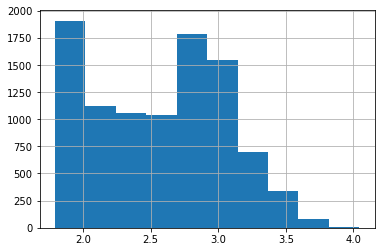

In [88]:
bikeshare_new.wind_log.hist()
#наглядно видим, что распределение стало более симметричным

__Симметричный доверительный интервал для метрики temp при доверительной вероятности 0.95__

<AxesSubplot:>

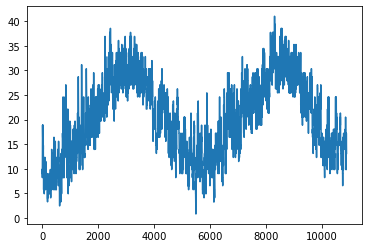

In [89]:
bikeshare.temp.plot()

In [79]:
def my_norm_confidence(df=bikeshare, column = "temp", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [80]:
confidence = my_norm_confidence()
print(confidence)

(4.959624343428603, 35.502095296475744)


Text(0.5, 1.0, 'Доверительный интервал')

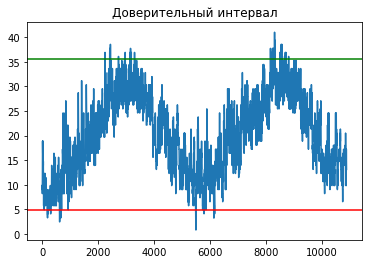

In [92]:
bikeshare.temp.plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")

In [113]:
bikeshare["anomaly_big"] = np.where(bikeshare.temp > confidence[1], 1,0)

In [114]:
#наблюдения выходящие за границы 95% доверительного интервала с температурой > 35.50
bikeshare[bikeshare.anomaly_big == 1]

,holiday,workingday,season,humidity,temp,windspeed,count,anomaly_big,anomaly_small
2247,0,1,2,37,36.90,12.9980,154,1,0
2248,0,1,2,37,36.90,16.9979,145,1,0
2249,0,1,2,39,36.90,19.9995,152,1,0
2414,0,1,2,42,36.08,8.9981,149,1,0
2415,0,1,2,42,36.90,0.0000,136,1,0
...,...,...,...,...,...,...,...,...,...
8716,0,0,3,44,36.08,31.0009,523,1,0
8717,0,0,3,42,36.90,31.0009,526,1,0
8718,0,0,3,37,36.90,35.0008,450,1,0
8813,0,1,3,32,36.08,15.0013,247,1,0


In [115]:
bikeshare[bikeshare.anomaly_big == 0]

,holiday,workingday,season,humidity,temp,windspeed,count,anomaly_big,anomaly_small
0,0,0,1,81,9.84,0.0000,16,0,0
1,0,0,1,80,9.02,0.0000,40,0,0
2,0,0,1,80,9.02,0.0000,32,0,0
3,0,0,1,75,9.84,0.0000,13,0,0
4,0,0,1,75,9.84,0.0000,1,0,0
...,...,...,...,...,...,...,...,...,...
10881,0,1,4,50,15.58,26.0027,336,0,0
10882,0,1,4,57,14.76,15.0013,241,0,0
10883,0,1,4,61,13.94,15.0013,168,0,0
10884,0,1,4,61,13.94,6.0032,129,0,0


In [101]:
anomaly_t_big = bikeshare.query('temp > 35.5020')
anomaly_t_big.temp

2247    36.90
2248    36.90
2249    36.90
2414    36.08
2415    36.90
        ...  
8716    36.08
8717    36.90
8718    36.90
8813    36.08
8814    36.08
Name: temp, Length: 117, dtype: float64

In [117]:
#наблюдения выходящие за границы 95% доверительного интервала > 35.50
117/(10769+117)*100

1.074774940290281

<AxesSubplot:>

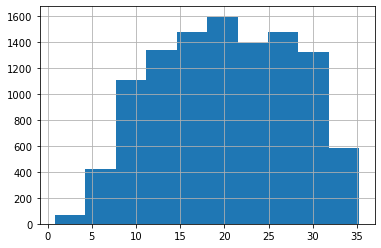

In [118]:
bikeshare[bikeshare.temp <35.50].temp.hist()

In [106]:
bikeshare["anomaly_small"] = np.where(bikeshare.temp < confidence[0], 1,0)

In [108]:
#наблюдения выходящие за границы 95% доверительного интервала < 4.95
bikeshare[bikeshare.anomaly_small == 1]

,holiday,workingday,season,humidity,temp,windspeed,count,anomaly_big,anomaly_small
73,0,1,1,68,4.92,7.0015,4,0,1
74,0,1,1,74,4.92,7.0015,36,0,1
75,0,1,1,74,4.92,8.9981,94,0,1
181,0,0,1,36,4.92,16.9979,28,0,1
182,0,0,1,39,4.92,23.9994,37,0,1
...,...,...,...,...,...,...,...,...,...
6167,0,1,1,58,4.10,8.9981,17,0,1
6168,0,1,1,54,4.10,15.0013,72,0,1
6169,0,1,1,54,4.10,12.9980,195,0,1
6170,0,1,1,54,4.10,8.9981,417,0,1


In [96]:
bikeshare[bikeshare.anomaly_small == 0]

,holiday,workingday,season,humidity,temp,windspeed,count,wind_log,anomaly_small
0,0,0,1,81,9.84,0.0000,16,-inf,0
1,0,0,1,80,9.02,0.0000,40,-inf,0
2,0,0,1,80,9.02,0.0000,32,-inf,0
3,0,0,1,75,9.84,0.0000,13,-inf,0
4,0,0,1,75,9.84,0.0000,1,-inf,0
...,...,...,...,...,...,...,...,...,...
10881,0,1,4,50,15.58,26.0027,336,3.258200,0
10882,0,1,4,57,14.76,15.0013,241,2.708137,0
10883,0,1,4,61,13.94,15.0013,168,2.708137,0
10884,0,1,4,61,13.94,6.0032,129,1.792293,0


In [99]:
anomaly_t_small = bikeshare.query('temp < 4.9596')
anomaly_t_small.temp

73      4.92
74      4.92
75      4.92
181     4.92
182     4.92
        ... 
6167    4.10
6168    4.10
6169    4.10
6170    4.10
6171    4.92
Name: temp, Length: 129, dtype: float64

In [98]:
#процент наблюдений температуры < 4.95
129/(10757+129)*100

1.1850082674995406

<AxesSubplot:>

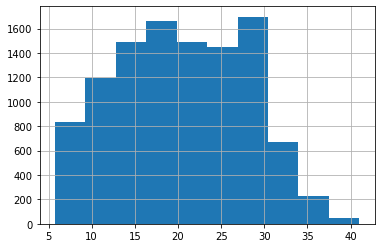

In [110]:
bikeshare[bikeshare.temp > 4.95].temp.hist()

In [13]:
#поиск высоких значений, выходящих за 3 сигмы метрики
def max_anomaly_dataset (bikeshare, column):
    upper_level = bikeshare[column].mean() + 3*bikeshare[column].std()
    level_99 = np.percentile(bikeshare[column], 99)
    anomaly = bikeshare[(bikeshare[column] >= upper_level)^(bikeshare[column] >= level_99)]
    return anomaly, upper_level, level_99

In [14]:
anomaly_max = max_anomaly_dataset (bikeshare, column = 'temp')
anomaly_max

(      holiday  workingday  season  humidity   temp  windspeed  count
 2247        0           1       2        37  36.90    12.9980    154
 2248        0           1       2        37  36.90    16.9979    145
 2249        0           1       2        39  36.90    19.9995    152
 2414        0           1       2        42  36.08     8.9981    149
 2415        0           1       2        42  36.90     0.0000    136
 ...       ...         ...     ...       ...    ...        ...    ...
 8716        0           0       3        44  36.08    31.0009    523
 8717        0           0       3        42  36.90    31.0009    526
 8718        0           0       3        37  36.90    35.0008    450
 8813        0           1       3        32  36.08    15.0013    247
 8814        0           1       3        32  36.08    15.0013    267
 
 [117 rows x 7 columns],
 43.605629351914686,
 36.08)

In [142]:
anomaly_max[1]

43.605629351914686

In [143]:
anomaly_max[2]

36.08

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


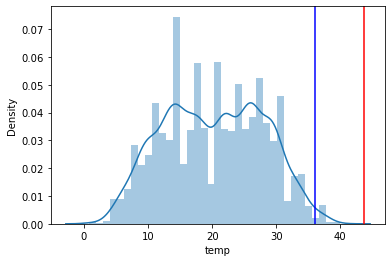

In [144]:
#отметим найденные значения на распределении
sns.distplot(bikeshare.temp)
plt.axvline(x=anomaly_max[1], color = "r", linestyle = "-")
plt.axvline(x=anomaly_max[2], color = "b", linestyle = "-")

In [151]:
#поиск низких и высоких значений температуры +- 3 сигмы метрики
def min_anomaly_dataset (bikeshare, column):
    upper_level = bikeshare[column].mean() +- 3*bikeshare[column].std()
    level_99 = np.percentile(bikeshare[column], 99)
    anomaly = bikeshare[(bikeshare[column] >= upper_level)^(bikeshare[column] >= level_99)]
    return anomaly, upper_level, level_99

In [156]:
anomaly_min_max= min_anomaly_dataset (bikeshare, column = 'temp')
anomaly_min_max

(       holiday  workingday  season  humidity   temp  windspeed  count  \
 0            0           0       1        81   9.84     0.0000     16   
 1            0           0       1        80   9.02     0.0000     40   
 2            0           0       1        80   9.02     0.0000     32   
 3            0           0       1        75   9.84     0.0000     13   
 4            0           0       1        75   9.84     0.0000      1   
 ...        ...         ...     ...       ...    ...        ...    ...   
 10881        0           1       4        50  15.58    26.0027    336   
 10882        0           1       4        57  14.76    15.0013    241   
 10883        0           1       4        61  13.94    15.0013    168   
 10884        0           1       4        61  13.94     6.0032    129   
 10885        0           1       4        66  13.12     8.9981     88   
 
        anomaly_big  anomaly_small  
 0                0              0  
 1                0              0  

In [157]:
anomaly_min_max[1]

-3.1439097120103447

In [158]:
anomaly_min_max[2]

36.08

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


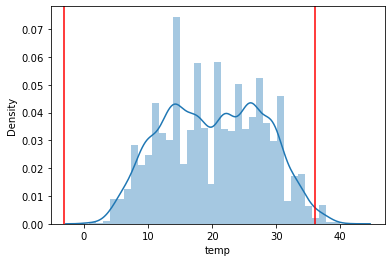

In [160]:
#отметим найденные значения на распределении
sns.distplot(bikeshare.temp)
plt.axvline(x=anomaly_min_max[1], color = "r", linestyle = "-")
plt.axvline(x=anomaly_min_max[2], color = "r", linestyle = "-")

In [33]:
#определение границ выбросов другим путем
lower_bound = bikeshare['temp'].mean()-3*bikeshare['temp'].std()
upper_bound = bikeshare['temp'].mean()+3*bikeshare['temp'].std()
print(lower_bound, upper_bound)

-3.1439097120103447 43.605629351914686


- Таким образом, все значения меньшие, чем -3.14 и большие, чем 43.60 будут считаться выбросами, проверим есть ли такие значения в показателях температуры.

In [26]:
t_small = bikeshare.query('temp < -3.1439097120103447')
t_small.temp

Series([], Name: temp, dtype: float64)

In [32]:
t_big = bikeshare.query('temp > 43.605')
t_big.temp

Series([], Name: temp, dtype: float64)

- Так как получили пустые серии, можем сделать вывод, что выбросов в показаниях температуры нет.